Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [2]:
chocolate = pd.read_csv('data/chocolate.csv')
chocolate

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,1205,Habitual,Canada,2014,Blend,one hundred,100%,NaN,"unrefined, bitter, earthy",2.00
1,701,Haigh,Australia,2011,Blend,South America and Africa,70%,NaN,"vanilla, chocolate milk",3.00
2,1113,Hotel Chocolat,U.K.,2013,St. Lucia,"Island Growers, 2012, 120hr c., batch 13080",100%,NaN,"pastey, bitter, unfixable",1.75
3,296,Hotel Chocolat (Coppeneur),U.K.,2008,Uganda,Uganda,80%,NaN,"charred, espresso",2.50
4,552,Hotel Chocolat (Coppeneur),U.K.,2010,Ecuador,Ecuador,70%,NaN,"spicy, sour, burning",2.75
...,...,...,...,...,...,...,...,...,...,...
1555,336,Bonnat,France,2009,Peru,"Porcelana, Apotequil",75%,"3- B,S,C","flat, bread, earthy",2.75
1556,331,Bonnat,France,2009,Ivory Coast,Ivory Coast,75%,"3- B,S,C","oily, intense cocoa, sl. Burnt",3.00
1557,336,Bonnat,France,2009,Mexico,"Porcelana, Tabasco, Marfil de Blanco",75%,"3- B,S,C","mild bitter, nut, possible mold",3.00
1558,395,Bonnat,France,2009,Mexico,"Xoconusco, cacao Real",75%,"3- B,S,C","fatty, roasty, earthy",3.00


Finding the Company Location with the highest average rating

In [9]:
company_rating = chocolate[['Company Location','Rating']]
company_rating

,Company Location,Rating
0,Canada,2.00
1,Australia,3.00
2,U.K.,1.75
3,U.K.,2.50
4,U.K.,2.75
...,...,...
1555,France,2.75
1556,France,3.00
1557,France,3.00
1558,France,3.00


In [11]:
rating_grouped = company_rating.groupby('Company Location').mean().reset_index()
rating_grouped

,Company Location,Rating
0,Amsterdam,3.218750
1,Argentina,3.150000
2,Australia,3.433824
3,Austria,3.192308
4,Belgium,3.086538
5,Brazil,3.194444
6,Canada,3.357877
7,Chile,3.750000
8,Colombia,2.500000
9,Costa Rica,3.093750


Text(0, 0.5, 'Rating')

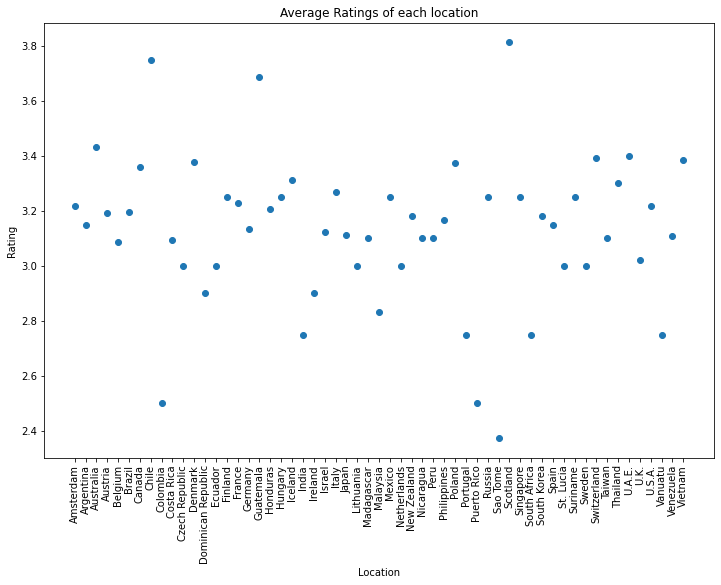

In [39]:
rating = rating_grouped['Rating']
company_location = rating_grouped['Company Location']
plt.figure(figsize = (12,8))
plt.scatter(company_location,rating)
plt.xticks (rotation= 90)
plt.title('Average Ratings of each location')
plt.xlabel('Location')
plt.ylabel('Rating')
#plt.savefig('figures/Location_Rating', plottype = 'png')

From this plot, we can see that most of the countries' rating wee between the range of 2.8 and 3.4 except for six locations; three above a rating og  3.4 and three below 2.8

In [35]:
min_locations = rating_grouped.sort_values('Rating', ascending = True)['Company Location'].values[0:3]
max_locations = rating_grouped.sort_values('Rating', ascending = False)['Company Location'].values[0:3]

In [38]:
print('The locations with the lowest average ratings are',min_locations)
print('The locations with the highest average ratings are',max_locations)

The locations with the lowest average ratings are ['Sao Tome' 'Puerto Rico' 'Colombia']
The locations with the highest average ratings are ['Scotland' 'Chile' 'Guatemala']


In [12]:
max_rating = max(rating_grouped['Rating'])
max_company = rating_grouped[rating_grouped['Rating'] == max_rating]
max_company

,Company Location,Rating
40,Scotland,3.8125


Based on the table above, the company location with the highest average rating amongst the three was Scotland with an average rating of 3.8. 

In [16]:
min_rating = min(rating_grouped['Rating'])
min_company = rating_grouped[rating_grouped['Rating'] == min_rating]
min_company

,Company Location,Rating
39,Sao Tome,2.375


Based on the table above, the company location with the lowest average rating was Sao Tome with an average rating of 2.375. All the rows of from the Sao Tome location is shown below

Next, we will slice into the chocolate data to only have the three maximum rating locations and the three minimum rating locations

In [43]:
bools_min = [chocolate['Company Location'][i] in min_locations for i in np.arange(len(chocolate))]
min_companies = chocolate[bools_min]
min_companies

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
26,955,Mita,Colombia,2012,Colombia,Tumaco,65%,NaN,"vanilla, artificial, sweet",2.50
73,252,Claudio Corallo,Sao Tome,2008,Blend,"Principe, Sao Tome & Principe",100%,NaN,"chalky, musty, very bitter",1.00
560,1606,Cacao Arabuco,Puerto Rico,2015,Puerto Rico,Puerto Rico,70%,"2- B,S","dirt, floral, sweet",2.50
643,470,Claudio Corallo,Sao Tome,2010,Blend,"Terreiro Velho P., Sao Tome & Principe",73.50%,"2- B,S","short,mild cocoa, mild fruit",3.75


In [42]:
bools_max = [chocolate['Company Location'][i] in max_locations for i in np.arange(len(chocolate))]
max_companies = chocolate[bools_max]
max_companies

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
290,1638,Obolo,Chile,2015,Peru,"Pangoa, w/ nibs",70%,"2- B,S","creamy, roasty, mild grape",3.75
291,2386,Obolo,Chile,2019,Peru,"Pangoa, 2018, batch 1584 - E",70%,"2- B,S","intense grapes, sweet cocoa",3.75
627,1121,Chocolate Tree,Scotland,2013,Peru,Peru,70%,"2- B,S","intense orange, floral notes",3.75
628,1582,Chocolate Tree,Scotland,2015,Venezuela,Carenero Superior,80%,"2- B,S","mild bitter, fruit, spice",3.75
684,991,Danta,Guatemala,2012,Guatemala,"Oscuro, Finca Chimelb",70%,"2- B,S","nutty, ashey, spicy pepper",3.25
685,987,Danta,Guatemala,2012,Guatemala,Los Ujuxtes,70%,"2- B,S",spicy,3.75
686,987,Danta,Guatemala,2012,Madagascar,Sambirano,70%,"2- B,S","oily, toffee, hints of fruit",3.75
687,987,Danta,Guatemala,2012,Guatemala,Las Acacias E.,70%,"2- B,S","sweet spice, floral",4.00
1164,1558,Ocelot,Scotland,2015,Congo,Virunga,70%,"3- B,S,C","melon, earthy, tobacco",3.75
1165,1558,Ocelot,Scotland,2015,Peru,Piura,75%,"3- B,S,C","peanut butter, raspberry",4.00


Using these two datasets, we will analyze how ingredients affects these ratings of chocolates and how this relationship links to the top three and bottom three rated locations.

In [23]:
ingredients = chocolate.dropna(subset = ['Ingredients'])[['Ingredients','Rating']]
ingredients_grouped = ingredients.groupby('Ingredients').mean().reset_index()
ingredients_grouped

,Ingredients,Rating
0,1- B,2.958333
1,"2- B,C",3.000000
2,"2- B,S",3.229457
3,"2- B,S*",2.959677
4,"3- B,S*,C",2.937500
5,"3- B,S*,Sa",2.500000
6,"3- B,S,C",3.280540


Text(0.5, 0, 'Ingredient')

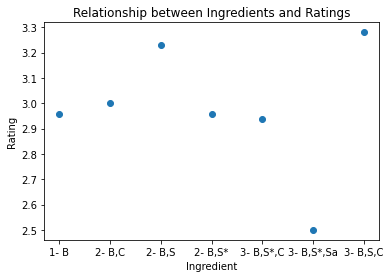

In [27]:
x = ingredients_grouped['Ingredients']
y = ingredients_grouped['Rating']
plt.scatter(x,y)
plt.title('Relationship between Ingredients and Ratings')
plt.ylabel('Rating')
plt.xlabel('Ingredient')
#plt.savefig('figures/Ingredients_Ratings', plottype = 'png')

From this plot, the ingredient 3- B,S*,Sa has the lowest overall mean rating and the ingredient 3- B,S,C has the highest.

The top three rated company locations have the highest rated ingredients  which is 2-B,S and 3-B,S,C however, the lowest rated companies ratings may be due to another feature in the dataset as the ingredients in Nan values and 2-B,C ingredients